In [0]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
import os

In [0]:
#import sklearn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

In [0]:
sns.set(style = "white", context="notebook", palette="deep")

In [0]:
#Set pandas options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
from google.colab import files

uploaded = files.upload()

Saving Final_Fifa_Data.csv to Final_Fifa_Data.csv


In [0]:
#Read File
FifaData = pd.read_csv('Final_Fifa_Data.csv')
#View Dataframe and rename the response variable column
FifaData.head()

,Name,Age,Nationality,GOLD_Overall,Overall,Potential,Club,Market Value of player,Value(¬Ç in M),diff btw market vs. original,New success,success(Value>11.77M),Wage(¬Ç in K),Diff btw Value over Wage,OLD SUCCESS VALUE,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Prob(GOLD_Overall==0) 2,Prob(GOLD_Overall==1) 2,Most Likely GOLD_Overall 2_DT_Without_Potential,Prob(GOLD_Overall==0),Prob(GOLD_Overall==1),Most Likely GOLD_Overall_with_Potential Variable_DT
0,F. Fajr,28,Morocco,0,75,75,Getafe CF,350,6.500,-3.000,0,0,23,6.477,1,1942,68,59,76,72,79,63,81,82,76,69,77,15,12,14,15,6,49,31,43,75,79,51,73,69,68,0.929551,0.070449,0,0.999636,0.000364,0
1,T. Ci√Ñ¬üerci,25,Turkey,0,74,77,Galatasaray SK,384,6.000,-2.160,0,0,43,5.957,1,1990,63,72,61,59,74,59,69,74,71,56,61,12,11,11,9,12,70,74,74,75,58,70,59,72,67,0.929551,0.070449,0,0.999636,0.000364,0
2,Y. Pel©,34,France,0,75,75,Olympique Marseille,939,2.700,6.690,0,0,20,2.680,0,1157,51,33,42,54,18,64,15,14,13,14,15,75,74,70,72,76,16,24,67,33,13,12,13,15,70,0.929551,0.070449,0,0.999636,0.000364,0
3,M. Sarr,22,Germany,0,63,71,VfL Wolfsburg,504,0.475,4.565,0,0,8,0.467,0,1557,63,53,64,54,59,62,49,39,58,45,38,8,12,14,10,7,65,61,70,63,22,63,60,26,55,0.929551,0.070449,0,0.999636,0.000364,0
4,M. Carrick,35,England,1,80,80,Manchester United,3212,3.500,28.620,1,0,86,3.414,0,1992,43,64,58,62,79,88,72,68,71,59,59,13,12,11,15,9,71,81,72,85,64,73,64,66,85,0.370276,0.629724,1,0.089070,0.910930,1


In [0]:
# y - Gold_Overall, x - Accelerations, Reactions, Positioning, GK reflexes, Free kick accuracy, Ball control, Composure, Balance
#FifaDataSubset = FifaData[['GOLD_Overall', 'Acceleration', 'Reactions', 'Positioning', 'GK reflexes', 'Free kick accuracy', 'Ball control', 'Balance']]
ColumnsSubset = ['GOLD_Overall',  'Acceleration', 'Reactions', 'Positioning', 'GK reflexes', 'Free kick accuracy', 'Ball control', 'Composure']
FifaDataSubset = FifaData[ColumnsSubset]
FifaDataSubset.head()

,GOLD_Overall,Acceleration,Reactions,Positioning,GK reflexes,Free kick accuracy,Ball control,Composure
0,0,68,68,69,6,77,79,63
1,0,63,67,72,12,61,74,59
2,0,51,70,15,76,15,18,64
3,0,63,55,26,7,38,59,62
4,1,43,85,66,9,59,79,88


In [0]:
#Summary Fifa Data
FifaDataSubset.describe()

,GOLD_Overall,Acceleration,Reactions,Positioning,GK reflexes,Free kick accuracy,Ball control,Composure
count,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000
mean,0.221840,66.922489,68.696067,54.998473,17.626957,47.696449,64.766323,64.593738
std,0.415564,14.751044,10.017633,21.648099,20.447052,19.503518,18.433402,13.573608
min,0.000000,13.000000,30.000000,3.000000,1.000000,8.000000,10.000000,12.000000
25%,0.000000,60.000000,62.000000,43.000000,8.000000,34.000000,61.000000,58.000000
50%,0.000000,69.000000,70.000000,61.000000,11.000000,48.000000,70.000000,67.000000
75%,0.000000,77.000000,76.000000,72.000000,14.000000,64.000000,77.000000,74.000000
max,1.000000,96.000000,96.000000,95.000000,90.000000,96.000000,95.000000,100.000000


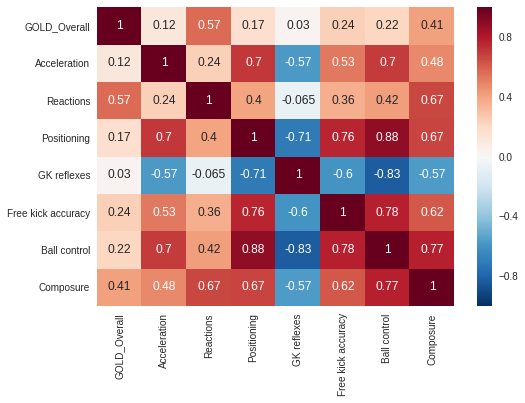

In [0]:
#Plot correlations among these variables
sns.heatmap(FifaDataSubset.corr(), annot = True)

In [0]:
FifaDataSubset.dtypes

GOLD_Overall          int64
Acceleration          int64
Reactions             int64
Positioning           int64
GK reflexes           int64
Free kick accuracy    int64
Ball control          int64
Composure             int64
dtype: object

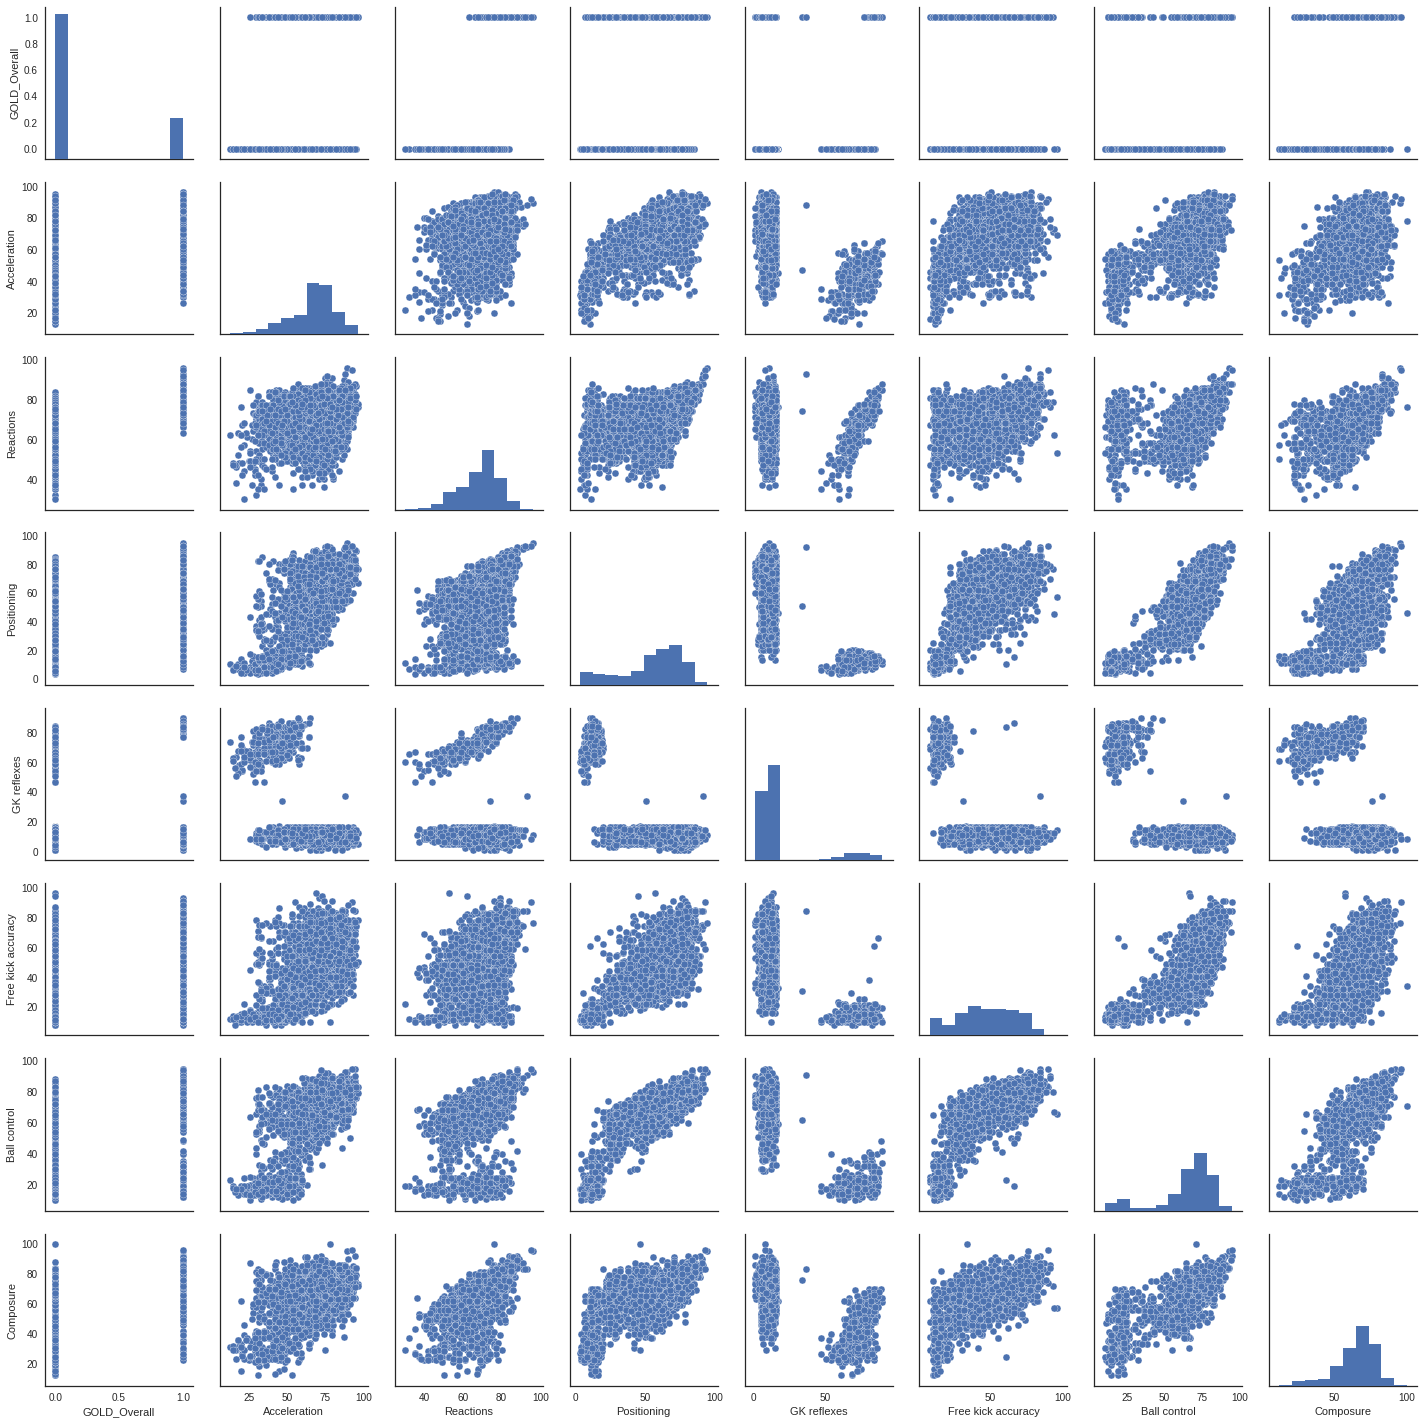

In [0]:
sns.pairplot(FifaDataSubset[ColumnsSubset])

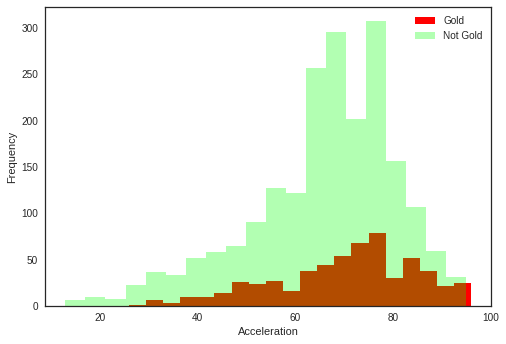

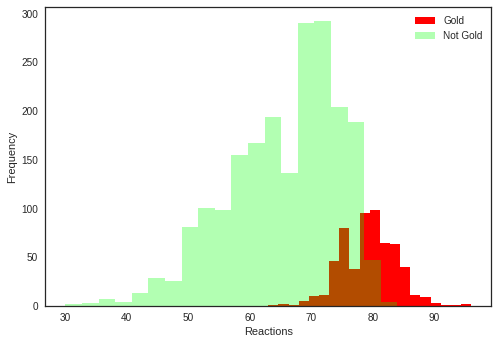

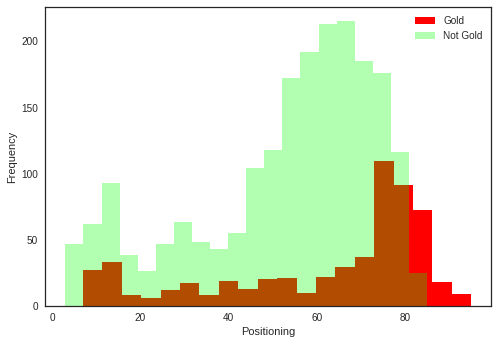

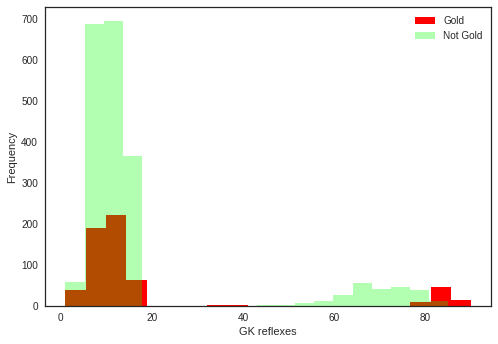

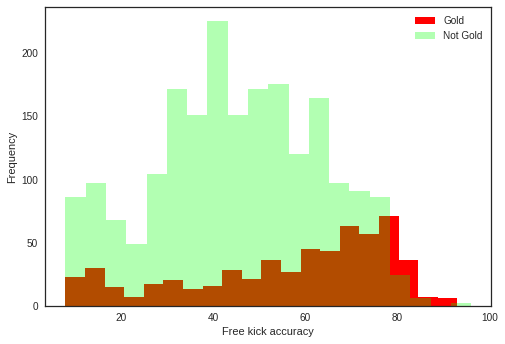

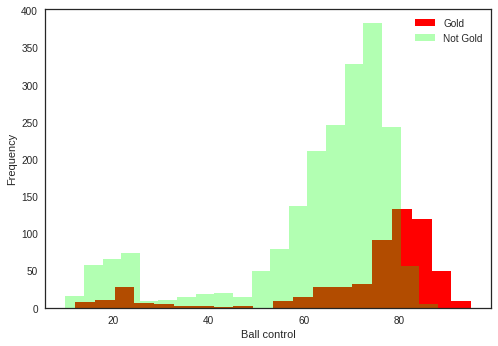

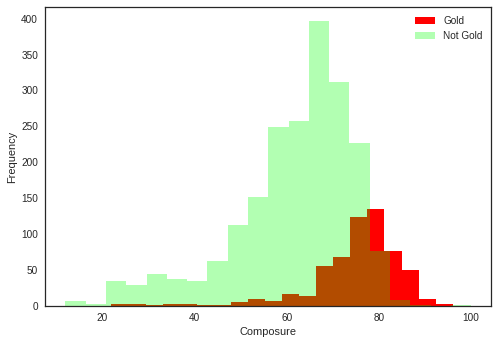

In [0]:
#Plot all x variable distributions to be categorized by Gold/No Gold to find out the characteristics of a Gold player
for col in FifaDataSubset.iloc[:,1:].columns.tolist():
    plt.hist(FifaDataSubset[FifaDataSubset['GOLD_Overall'] == 1][col], bins = 20, label = "Gold", fc = (1,0,0, 1))
    plt.hist(FifaDataSubset[FifaDataSubset['GOLD_Overall'] == 0][col], bins = 20, label = 'Not Gold', fc = (0,1,0, 0.3) )
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [0]:
#Machine Learning modeling
train = FifaDataSubset[:1310]
X_train = train.drop('GOLD_Overall', axis = 1)
test = FifaDataSubset[1310:2619]
X_test = test.drop('GOLD_Overall', axis = 1)

Y_train = train['GOLD_Overall']
Y_test = test['GOLD_Overall']

In [0]:
#Cross validation
kfold = StratifiedKFold(n_splits = 10)
random_state = 5
classifiers = []
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state= random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))
classifiers.append(GradientBoostingClassifier(random_state= random_state))
classifiers.append(AdaBoostClassifier(random_state = random_state))
classifiers.append(MLPClassifier(random_state = random_state))

In [0]:
#Only Logistic Regression Model
for model in classifiers:
  Model = model
  Model = Model.fit(X_train, Y_train)
  ModelPredictTrain = Model.predict(X_train)
  ModelPredictTest = Model.predict(X_test)
  display(model)
  
  display(accuracy_score(y_true = Y_train, y_pred = ModelPredictTrain))
  display(accuracy_score(y_true = Y_test, y_pred = ModelPredictTest))
  display ("R2 scores")
  display(r2_score(y_true = Y_train, y_pred = ModelPredictTrain))
  display(r2_score(y_true = Y_test, y_pred = ModelPredictTest))
  display("------")


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.8709923664122138

0.880061115355233

'R2 scores'

0.26588985860943837

0.2922082394836718

'------'

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.9251908396946565

0.9037433155080213

'R2 scores'

0.5743029949332839

0.43196330047734166

'------'

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

1.0

0.8792971734148205

'R2 scores'

1.0

0.2877000117096825

'------'

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

0.9908396946564886

0.919022154316272

'R2 scores'

0.9478738361142797

0.5221278559571287

'------'

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=5, subsample=1.0, verbose=0,
              warm_start=False)

0.966412213740458

0.9213139801375095

'R2 scores'

0.8088707324190254

0.5356525392790967

'------'

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=5)

0.9320610687022901

0.9083269671504965

'R2 scores'

0.613397617847574

0.45901266712127786

'------'

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

0.7732824427480917

0.773109243697479

'R2 scores'

-0.2901225561715788

-0.3389436488748374

'------'

In [0]:
#Store CV scores
CV_Results = []
for classifier in classifiers:
    CV_Results.append(cross_val_score(classifier, X_train, Y_train, scoring = "accuracy", cv = kfold, n_jobs = 4))

CV_means = []
CV_std = []

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Model Accuracy Comparison')

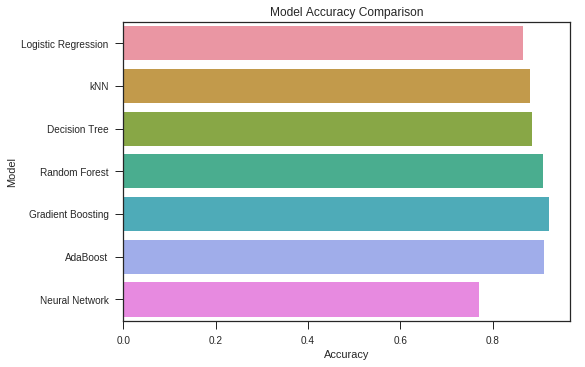

In [0]:
#Store CV means and std
for cv_result in CV_Results:
    CV_means.append(cv_result.mean())
    CV_std.append(cv_result.std())

sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})
#Store Classifier algorithms in a list
ClassifierAlgos = ['Logistic Regression', 'kNN', 'Decision Tree','Random Forest', 'Gradient Boosting', 'AdaBoost', 'Neural Network']
fig = sns.barplot(y=ClassifierAlgos, x = CV_means, orient = "h")
#fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
fig.set_xlabel('Accuracy')
fig.set_ylabel('Model')
plt.title('Model Accuracy Comparison')

In [0]:
#Ensemble voting classifier
from sklearn.ensemble import VotingClassifier
VotingClassifier = VotingClassifier(estimators = [('kNN', classifiers[1]), ('Logistic Regression', classifiers[0]), ('GradientBoosting', classifiers[4]), ('AdaBoost', classifiers[5])], voting = 'soft')
EnsembleModel = VotingClassifier.fit(X_train, Y_train)

In [0]:
display(X_test.head())
display(X_train.head())
display(Y_train.head())

,Acceleration,Reactions,Positioning,GK reflexes,Free kick accuracy,Ball control,Composure
1310,84,64,65,13,47,73,59
1311,47,70,50,13,39,61,52
1312,63,41,23,8,28,57,52
1313,67,78,80,13,57,80,71
1314,68,66,71,9,56,70,71


,Acceleration,Reactions,Positioning,GK reflexes,Free kick accuracy,Ball control,Composure
0,68,68,69,6,77,79,63
1,63,67,72,12,61,74,59
2,51,70,15,76,15,18,64
3,63,55,26,7,38,59,62
4,43,85,66,9,59,79,88


0    0
1    0
2    0
3    0
4    1
Name: GOLD_Overall, dtype: int64

In [0]:
#Training prediction
Gold_Prediction_Ensemble_Train = pd.Series(EnsembleModel.predict(X_train), name = "Gold_Player_Predict_Train")
display(confusion_matrix(y_true = Y_train, y_pred = Gold_Prediction_Ensemble_Train))
display(accuracy_score(y_true = Y_train, y_pred = Gold_Prediction_Ensemble_Train))
display(r2_score(y_true = Y_train, y_pred = Gold_Prediction_Ensemble_Train))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[1000,   12],
       [  58,  240]])

0.9465648854961832

0.6959307106666313

In [0]:
Predicted_Prob = []
for i in range(0,len(EnsembleModel.predict_proba(X_test))):
  Predicted_Prob.append(EnsembleModel.predict_proba(X_test)[i][1])
  

In [0]:
Predicted_Prob_Train = []
for i in range(0,len(EnsembleModel.predict_proba(X_train))):
  Predicted_Prob_Train.append(EnsembleModel.predict_proba(X_train)[i][1])

In [0]:
#Testing Prediction
Gold_Prediction_Ensemble_Test = pd.Series(EnsembleModel.predict(X_test), name = "Gold_Player_Predict_Test")
display(confusion_matrix(y_true = Y_test, y_pred = Gold_Prediction_Ensemble_Test))
display(accuracy_score(y_true = Y_test, y_pred = Gold_Prediction_Ensemble_Test))
display(r2_score(y_true = Y_test, y_pred = Gold_Prediction_Ensemble_Test))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[991,  35],
       [ 63, 220]])

0.9251336898395722

0.5581936781490435

In [0]:
#Training
fpr, tpr, thresholds = roc_curve(y_true = Y_train, y_score = Predicted_Prob_Train)
roc_auc = auc(fpr, tpr)

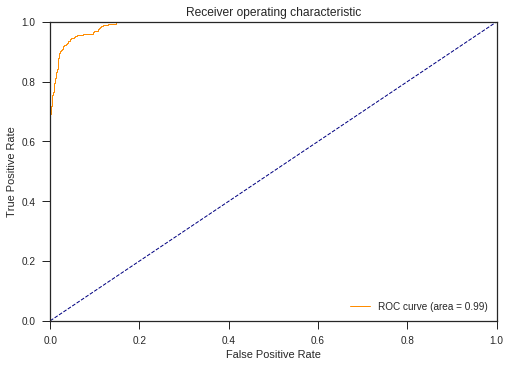

In [0]:
#Training
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
#Testing
fpr, tpr, thresholds = roc_curve(y_true = Y_test, y_score = Predicted_Prob)
roc_auc = auc(fpr, tpr)

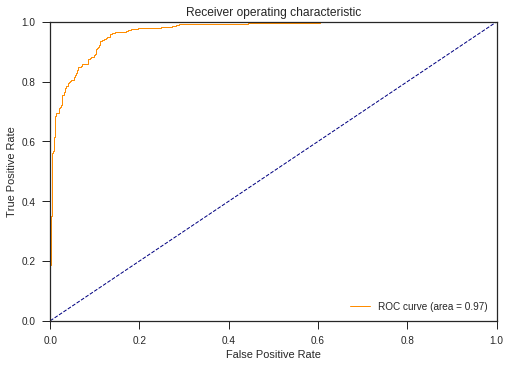

In [0]:
#Testing
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
Ensemble_Model_Predict = pd.concat([Gold_Prediction_Ensemble_Train, Gold_Prediction_Ensemble_Test]).reset_index().drop(['index'], axis = 1).rename(columns = {0: 'Ensemble_Model_Predict'})

In [0]:
Ensemble_Model_Predict.index.is_unique

True

In [0]:
#FifaDataSubset2 = FifaDataSubset.drop_duplicates(inplace = True)
FifaDataNew = pd.concat([FifaData, Ensemble_Model_Predict], axis = 1)


In [0]:
FifaDataNew.to_csv('FifaDataPredict.csv')
files.download('FifaDataPredict.csv')